In [2]:
#
%matplotlib inline
import pybt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pybt
import modin.pandas as md
import swifter
from multiprocessing import Pool
from functools import partial

import itertools

import warnings
from IPython.core.display import display, HTML, Markdown

display(HTML("<style>.rendered_html { font-size: 17px; }</style>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

def printmd(string):
    display(Markdown(string))
warnings.filterwarnings('ignore')


plt.ion()
pd.options.display.min_rows = 200
pd.options.display.max_rows = 200

This work relies on previously done studies and in particar
 * Optimisation of Slow Extraction and Beam Delivery from Synchrotrons, P. Arrutia Sota *et al.*, CERN-THESIS-2020-259
 * TT20 beam loss reduction, M. Tat *et al.*, CERN-STUDENTS-Note-2019-219
 * Work preseted y A. Ciccotelli and L.S. Esposito in SLAWG 59 and 52
 * beam parameters from EDMS docuement 2360012

### Beam parameters at the entrance to the TCSC

In [3]:
Nparts = 100000
alfx, betx, epsx, Dx, Dpx = 0.86, 31.4, 20e-6/426.3, -0.16, -38e-3
alfy, bety, epsy, Dy, Dpy = -0.0208, 23986, 5e-6/426.3, -1.80, -1.5e-3
dpp = 0.5e-3

sigmax =   1.2 mm and sigmay=  16.8 mm


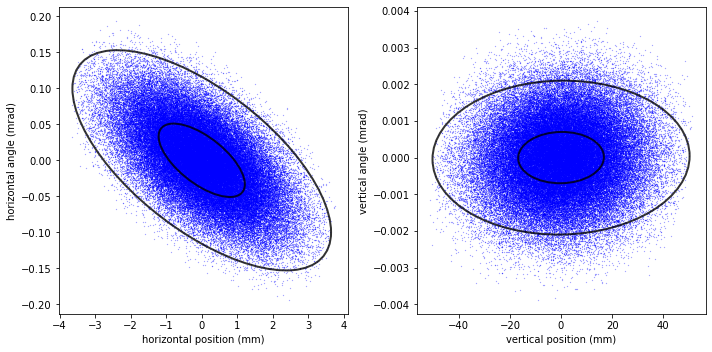

In [4]:
#
dist = pd.DataFrame()
dist[['x_nodp', 'px_nodp']] = pd.DataFrame(pybt.tools.particles.beam_distrib_norm(alfx, betx, epsx, Nparts, 3))
dist['dpp'] = pybt.tools.particles.dpp_distrib_norm(dpp, Nparts, 3)
dist['x'] =dist['x_nodp'] + Dx*dist['dpp'] 
dist['px'] = dist['px_nodp'] + Dpx*dist['dpp']

dist[['y_nodp', 'py_nodp']] = pd.DataFrame(pybt.tools.particles.beam_distrib_norm(alfy, bety, epsy, Nparts, 3))
dist['y'] = dist['y_nodp'] + Dy*dist['dpp']
dist['py'] = dist['py_nodp'] + Dpy*dist['dpp']

fig, axs = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)

axs[0].plot(dist['x']*1e3, dist['px']*1e3, 'bo', alpha=0.7, markersize=0.2)
axs[0].set_xlabel('horizontal position (mm)')
axs[0].set_ylabel('horizontal angle (mrad)')
pybt.tools.plotters.draw_ellipse(alfx, betx, epsx*1e6, x0=(0, 0), ax=axs[0])
pybt.tools.plotters.draw_ellipse(alfx, betx, epsx*1e6*3**2, x0=(0, 0), ax=axs[0])

axs[1].plot(dist['y']*1e3, dist['py']*1e3, 'bo', alpha=0.7, markersize=0.2)
axs[1].set_xlabel('vertical position (mm)')
axs[1].set_ylabel('vertical angle (mrad)')
pybt.tools.plotters.draw_ellipse(alfy, bety, epsy*1e6, x0=(0, 0), ax=axs[1])
pybt.tools.plotters.draw_ellipse(alfy, bety, epsy*1e6*3**2, x0=(0, 0), ax=axs[1])

dist_2018 = dist

print('sigmax = {:5.1f} mm and sigmay= {:5.1f} mm'.format(np.sqrt(epsx*betx)*1e3, np.sqrt(epsy*bety)*1e3))

In [5]:
Nparts = 100000
alfx, betx, epsx, Dx, Dpx = 0.86, 31.4, 20e-6/426.3, -0.16, -38e-3
alfy, bety, epsy, Dy, Dpy = -0.0208, 23986, 3e-6/426.3, -1.80, -1.5e-3
dpp = 0.5e-3

sigmax =   1.2 mm and sigmay=  13.0 mm


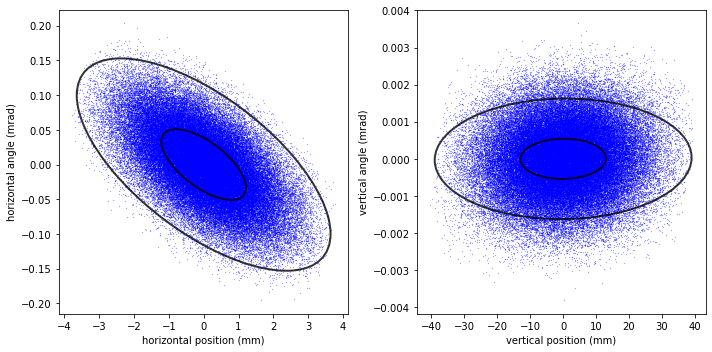

In [6]:
#
dist = pd.DataFrame()
dist[['x_nodp', 'px_nodp']] = pd.DataFrame(pybt.tools.particles.beam_distrib_norm(alfx, betx, epsx, Nparts, 3))
dist['dpp'] = pybt.tools.particles.dpp_distrib_norm(dpp, Nparts, 3)
dist['x'] =dist['x_nodp'] + Dx*dist['dpp'] 
dist['px'] = dist['px_nodp'] + Dpx*dist['dpp']

dist[['y_nodp', 'py_nodp']] = pd.DataFrame(pybt.tools.particles.beam_distrib_norm(alfy, bety, epsy, Nparts, 3))
dist['y'] = dist['y_nodp'] + Dy*dist['dpp']
dist['py'] = dist['py_nodp'] + Dpy*dist['dpp']

fig, axs = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)

axs[0].plot(dist['x']*1e3, dist['px']*1e3, 'bo', alpha=0.7, markersize=0.2)
axs[0].set_xlabel('horizontal position (mm)')
axs[0].set_ylabel('horizontal angle (mrad)')
pybt.tools.plotters.draw_ellipse(alfx, betx, epsx*1e6, x0=(0, 0), ax=axs[0])
pybt.tools.plotters.draw_ellipse(alfx, betx, epsx*1e6*3**2, x0=(0, 0), ax=axs[0])

axs[1].plot(dist['y']*1e3, dist['py']*1e3, 'bo', alpha=0.7, markersize=0.2)
axs[1].set_xlabel('vertical position (mm)')
axs[1].set_ylabel('vertical angle (mrad)')
pybt.tools.plotters.draw_ellipse(alfy, bety, epsy*1e6, x0=(0, 0), ax=axs[1])
pybt.tools.plotters.draw_ellipse(alfy, bety, epsy*1e6*3**2, x0=(0, 0), ax=axs[1])

dist_nominal = dist
print('sigmax = {:5.1f} mm and sigmay= {:5.1f} mm'.format(np.sqrt(epsx*betx)*1e3, np.sqrt(epsy*bety)*1e3))

In [7]:
alfx, betx, epsx, Dx, Dpx = 0.961, 31.9, 20e-6/426.3, 0.09, -40e-3
alfy, bety, epsy, Dy, Dpy = -0.0208, 6000, 3e-6/426.3, -1.80, -1e-3
dpp = 0.5e-3

sigmax =   1.2 mm and sigmay=   6.5 mm


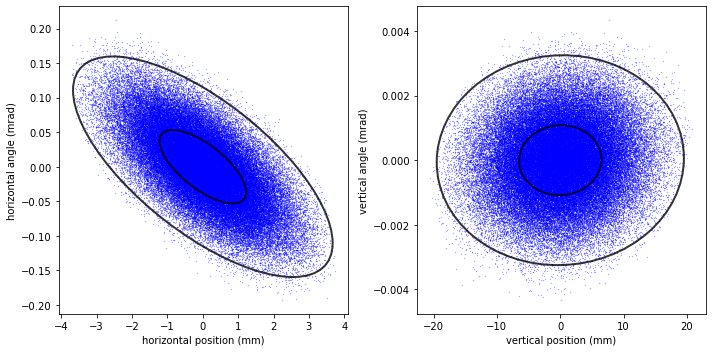

In [8]:
#
dist = pd.DataFrame()
dist[['x_nodp', 'px_nodp']] = pd.DataFrame(pybt.tools.particles.beam_distrib_norm(alfx, betx, epsx, Nparts, 3))
dist['dpp'] = pybt.tools.particles.dpp_distrib_norm(dpp, Nparts, 3)
dist['x'] =dist['x_nodp'] + Dx*dist['dpp'] 
dist['px'] = dist['px_nodp'] + Dpx*dist['dpp']

dist[['y_nodp', 'py_nodp']] = pd.DataFrame(pybt.tools.particles.beam_distrib_norm(alfy, bety, epsy, Nparts, 3))
dist['y'] = dist['y_nodp'] + Dy*dist['dpp']
dist['py'] = dist['py_nodp'] + Dpy*dist['dpp']

fig, axs = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)

axs[0].plot(dist['x']*1e3, dist['px']*1e3, 'bo', alpha=0.7, markersize=0.2)
axs[0].set_xlabel('horizontal position (mm)')
axs[0].set_ylabel('horizontal angle (mrad)')
pybt.tools.plotters.draw_ellipse(alfx, betx, epsx*1e6, x0=(0, 0), ax=axs[0])
pybt.tools.plotters.draw_ellipse(alfx, betx, epsx*1e6*3**2, x0=(0, 0), ax=axs[0])

axs[1].plot(dist['y']*1e3, dist['py']*1e3, 'bo', alpha=0.7, markersize=0.2)
axs[1].set_xlabel('vertical position (mm)')
axs[1].set_ylabel('vertical angle (mrad)')
pybt.tools.plotters.draw_ellipse(alfy, bety, epsy*1e6, x0=(0, 0), ax=axs[1])
pybt.tools.plotters.draw_ellipse(alfy, bety, epsy*1e6*3**2, x0=(0, 0), ax=axs[1])

dist_smallerV = dist
print('sigmax = {:5.1f} mm and sigmay= {:5.1f} mm'.format(np.sqrt(epsx*betx)*1e3, np.sqrt(epsy*bety)*1e3))

### Problem geometry

The TCSC is shaped in particular with a small 0.64 mm blade while the MSSBs have a zero thickness blade. Going outwards the thickness increases with an angle of 36 degrees up to 8mm from the center and then with an angle of 60 degrees up to the walls of the hole, at 14 mm from the center

In [9]:
#
import numpy as np
import shapely as shp
from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint
from descartes.patch import PolygonPatch
import matplotlib.pyplot as plt

# Function for upper geometry definition
def get_material_upper(blade_thickness, d1, d2, theta1, theta2, height):
    if(blade_thickness <= 0):
        gap = -blade_thickness
        Ysept_shift = -np.tan(theta1)*gap/2 + gap
        jaws = Polygon([
            (gap/2, 0),
            (gap/2, np.tan(theta1)*gap/2 + Ysept_shift),
            (d1, np.tan(theta1)*d1 + Ysept_shift),
            (d2, np.tan(theta1)*d1 + np.tan(theta2)*(d2-d1) + Ysept_shift),
            (d2, height), (-d2, height),
            (-d2, np.tan(theta1)*d1 + np.tan(theta2)*(d2-d1) + Ysept_shift),
            (-d1, np.tan(theta1)*d1 + Ysept_shift),
            (-gap/2, np.tan(theta1)*gap/2 + Ysept_shift),
            (-gap/2, 0)])     
    else:
        R = -blade_thickness/(1 - 1/np.cos(theta1))
        theta = np.linspace(-np.pi/2, -np.pi/2 + theta1, 100)

        X = R*np.cos(theta)
        Y = R*np.sin(theta) + blade_thickness + R
        X = np.append(X, [d1, d2, d2, -d2, -d2, -d1])
        Y = np.append(Y, [np.tan(theta1)*d1,
                          np.tan(theta1)*d1 + np.tan(theta2)*(d2-d1),
                          height, height,
                          np.tan(theta1)*d1 + np.tan(theta2)*(d2-d1),
                          np.tan(theta1)*d1])
        theta = np.linspace(-np.pi/2 - theta1, -np.pi/2, 100)
        X = np.append(X, R*np.cos(theta))
        Y = np.append(Y, R*np.sin(theta) + blade_thickness + R)
        jaws = Polygon([(x,y) for x, y in np.vstack([X,Y]).T])
    return jaws

# Function for lower geometry definition
def get_material_lower(left_width, right_width, height):
    jaws = Polygon([(0, 0), (-left_width, 0), (-left_width, -height), (right_width, -height), (right_width, 0)])
    return jaws



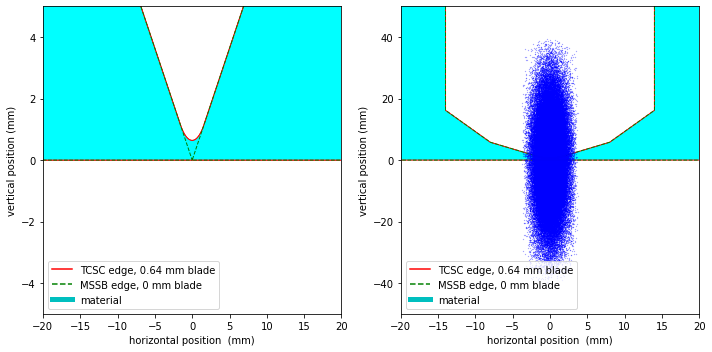

In [10]:
#
fig, axs = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)

whole_area = Polygon([(-100, -100), (-100, 100), (100, 100), (100, -100)])

material_upper_TCSC = get_material_upper(0.64, 8, 14, 36*np.pi/180, 60*np.pi/180, 100)
material_upper_MSSB = get_material_upper(0, 8, 14, 36*np.pi/180, 60*np.pi/180, 100)
material_lower = Polygon([(-100, -100), (-100, 0), (100, 0), (100, -100)])

TCSC = whole_area.difference(material_upper_TCSC.union(material_lower))
MSSB = whole_area.difference(material_upper_MSSB.union(material_lower))

axs[0].add_patch(PolygonPatch(TCSC, facecolor='cyan', edgecolor='red', zorder=2))
# axs[0].add_patch(PolygonPatch(material_lower, facecolor='cyan', edgecolor='black', zorder=2))
# axs[0].add_patch(PolygonPatch(material_upper_MSSB, facecolor='None', edgecolor='green', zorder=2, linestyle='--'))
axs[0].set_ylim(-5, 5)

dist = dist_nominal
axs[1].plot(dist['x']*1e3, dist['y']*1e3,  'bo', alpha=0.7, markersize=0.2, zorder=2)
axs[1].set_ylim(-50, 50)

for ax in axs:
    ax.set_xlabel('horizontal position  (mm)')
    ax.set_ylabel('vertical position (mm)')
    ax.set_xlim(-20, 20)
    ax.plot([], [], 'r-', label='TCSC edge, 0.64 mm blade')
    ax.plot([], [], 'g--', label='MSSB edge, 0 mm blade')
    ax.plot([], [], 'c-', linewidth=5, label='material')
    ax.legend()
    ax.add_patch(PolygonPatch(TCSC, facecolor='cyan', edgecolor='red', zorder=2))
    ax.add_patch(PolygonPatch(MSSB, facecolor='None', edgecolor='green', linestyle='--', zorder=2))


In [11]:
def got_lost_in_elem(row, alignement, material_upper, length=0, back_drift=0):
    x_back, y_back = row['x']+length*row['px'], row['y']+length*row['py']

    in_top_entry = material_upper.contains(Point((row['x']-alignement['front'][0])*1e3, 
                                                 (row['y']-alignement['front'][1])*1e3))
    in_bot_entry = material_lower.contains(Point((row['x']-alignement['front'][0])*1e3, 
                                                 (row['y']-alignement['front'][1])*1e3))
    
    if (not in_top_entry) and (not in_bot_entry):
        return x_back+back_drift*row['px'], y_back+back_drift*row['py'], True, 'entry'
    
    
    in_top_back = material_upper.contains(Point((x_back-alignement['back'][0])*1e3, 
                                                (y_back-alignement['back'][1])*1e3))
    in_bot_back = material_lower.contains(Point((x_back-alignement['back'][0])*1e3, 
                                                (y_back-alignement['back'][1])*1e3))
    
    if (not in_top_back) and (not in_bot_back):
        return x_back+back_drift*row['px'], y_back+back_drift*row['py'], True, 'exit'
    elif in_top_entry and not in_top_back:
        return x_back+back_drift*row['px'], y_back+back_drift*row['py'], True, 'top in'
    elif in_bot_entry and not in_bot_back:
        return x_back+back_drift*row['px'], y_back+back_drift*row['py'], True, 'bottom in'
    else:
        return x_back+back_drift*row['px'], y_back+back_drift*row['py'], False, 'top' if in_top_back else 'bottom'

Longitudinally the problem is as follows
 1. a drift of 91 mm, ignored
 2. The front face of the TCSC
 3. A drift of 2500 mm
 4. The back face of the TCSC
 5. A drift of 856 mm
 6. The front face of the first MSSB
 7. A drift of 4110 mm
 8. The back face of the first MSSB
 9. A drift of 1442 mm
 10. The front face of the second MSSB
 11. A drift of 4110 mm
 12. The back face of the second MSSB
 13. A drift of 1442 mm
 14. The front face of the third MSSB
 15. A drift of 4110 mm
 16. The back face of the third MSSB


In [12]:
def got_lost_somehwere(row, scan_val, dimension, alignement, material_upper_TCSC, material_upper_MSSB):
    
    x =  row['x'] + scan_val if dimension=='x'  else row['x']
    px = row['px']+ scan_val if dimension=='px' else row['px']
    y =  row['y'] + scan_val if dimension=='y'  else row['y']
    py = row['py']+ scan_val if dimension=='py' else row['py']
    
    x, y, lost, where = got_lost_in_elem({'x':x, 'y':y, 'px':row['px'], 'py':row['py']}, 
                                         {'front':alignement['TCSC front'], 'back':alignement['TCSC back']}, material_upper_TCSC, 2500e-3, 856e-3)
    
    if lost:
        return True, 'TCSC '+where
    
    x, y, lost, where = got_lost_in_elem({'x':x, 'y':y, 'px':px, 'py':py}, 
                                         {'front':alignement['MSSB1 front'], 'back':alignement['MSSB1 back']}, 
                                         material_upper_MSSB, 4110e-3, 1442e-3)
    if lost:
        return True, 'MSSB1 '+where
    
    x, y, lost, where = got_lost_in_elem({'x':x, 'y':y, 'px':px, 'py':py}, 
                                         {'front':alignement['MSSB2 front'], 'back':alignement['MSSB2 back']}, 
                                         material_upper_MSSB, 4110e-3, 1442e-3)
    if lost:
        return True, 'MSSB2 '+where
    
    x, y, lost, where = got_lost_in_elem({'x':x, 'y':y, 'px':px, 'py':py}, 
                                         {'front':alignement['MSSB3 front'], 'back':alignement['MSSB3 back']}, 
                                         material_upper_MSSB, 4110e-3, 0)
    return lost, 'MSSB3 '+where if lost else where


In [13]:
alignement = {
    'TCSC front': [0, 0], 'TCSC back': [0, 0],
    'MSSB1 front': [0, 0], 'MSSB1 back': [0, 0],
    'MSSB2 front': [0, 0], 'MSSB2 back': [0, 0],
    'MSSB3 front': [0, 0], 'MSSB3 back': [0, 0],
    
}


In [14]:
def get_lost_summary(scan_val, dist, pre, dimension, alignement=alignement):
    dist[['lost', 'how']] = dist[['x', 'px', 'y', 'py']].apply(lambda row : got_lost_somehwere(row, scan_val, dimension,
                                                                                               alignement, material_upper_TCSC, material_upper_MSSB), axis=1, result_type='expand')
    top = (dist['how']=='top').sum()/len(dist)
    bottom = (dist['how']=='bottom').sum()/len(dist)
    lost = dist['lost'].sum()/len(dist)
    
    return top, bottom, lost


In [48]:
get_lost_summary(0, dist=dist_nominal, pre='', dimension='x')

(0.46751, 0.5021, 0.03039)

In [49]:
get_lost_summary(0, dist=dist_2018, pre='', dimension='x')

(0.47642, 0.49948, 0.0241)

In [50]:
get_lost_summary(0, dist=dist_smallerV, pre='', dimension='x')

(0.43842, 0.50208, 0.0595)

In [20]:
pool_size = 8

## horizontal position scan

Text(0, 0.5, 'fraction lost')

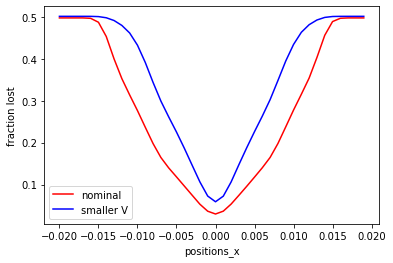

In [13]:
dimension='x'
scan = 'positions'
df = pd.DataFrame({scan:np.arange(-20, 20, 1)*1e-3})

pre = 'nominal '
with Pool(pool_size) as p:
    results = p.map(partial(get_lost_summary, dist=dist_nominal, pre=pre, dimension=dimension),
                    df[scan])
df[[pre+'top', pre+'bottom', pre+'lost']] = results


pre = 'smallerV '
with Pool(pool_size) as p:
    results = p.map(partial(get_lost_summary, dist=dist_smallerV, pre=pre, dimension=dimension),
                    df[scan])
df[[pre+'top', pre+'bottom', pre+'lost']] = results

df.to_pickle('efficiency_'+scan+'_'+dimension+'.pckl')
fig, ax = plt.subplots()

ax.plot(df[scan], df['nominal lost'], 'r-', label='nominal')
ax.plot(df[scan], df['smallerV lost'], 'b-', label='smaller V')
ax.legend()


ax.set_xlabel(scan+'_'+dimension)
ax.set_ylabel('fraction lost')

In [ ]:
dimension='x'
scan = 'positions'
df = pd.DataFrame({scan:np.arange(-20, 20, 1)*1e-3})

pre = 'nominal '
with Pool(pool_size) as p:
    results = p.map(partial(get_lost_summary, dist=dist_nominal, pre=pre, dimension=dimension),
                    df[scan])
df[[pre+'top', pre+'bottom', pre+'lost']] = results


pre = 'smallerV '
with Pool(pool_size) as p:
    results = p.map(partial(get_lost_summary, dist=dist_smallerV, pre=pre, dimension=dimension),
                    df[scan])
df[[pre+'top', pre+'bottom', pre+'lost']] = results

df.to_pickle('efficiency_'+scan+'_'+dimension+'.pckl')
fig, ax = plt.subplots()

ax.plot(df[scan], df['nominal lost'], 'r-', label='nominal')
ax.plot(df[scan], df['smallerV lost'], 'b-', label='smaller V')
ax.legend()


ax.set_xlabel(scan+'_'+dimension)
ax.set_ylabel('fraction lost')

## px scan

Text(0, 0.5, 'fraction lost')

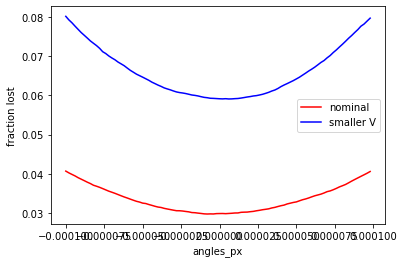

In [17]:
dimension='px'
scan = 'angles'
df = pd.DataFrame({scan:np.arange(-100, 100, 2)*1e-6})

pre = 'nominal '
with Pool(pool_size) as p:
    results = p.map(partial(get_lost_summary, dist=dist_nominal, pre=pre, dimension=dimension),
                    df[scan])
df[[pre+'top', pre+'bottom', pre+'lost']] = results


pre = 'smallerV '
with Pool(pool_size) as p:
    results = p.map(partial(get_lost_summary, dist=dist_smallerV, pre=pre, dimension=dimension),
                    df[scan])
df[[pre+'top', pre+'bottom', pre+'lost']] = results

df.to_pickle('efficiency_'+scan+'_'+dimension+'.pckl')
fig, ax = plt.subplots()

ax.plot(df[scan], df['nominal lost'], 'r-', label='nominal')
ax.plot(df[scan], df['smallerV lost'], 'b-', label='smaller V')
ax.legend()


ax.set_xlabel(scan+'_'+dimension)
ax.set_ylabel('fraction lost')

# y scan

Text(0, 0.5, 'fraction lost')

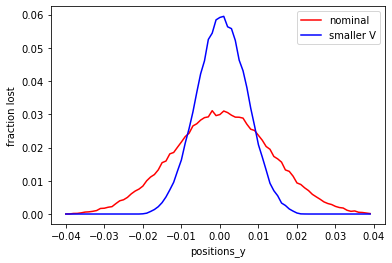

In [15]:
dimension='y'
scan = 'positions'
df = pd.DataFrame({scan:np.arange(-40, 40, 1)*1e-3})

pre = 'nominal '
with Pool(pool_size) as p:
    results = p.map(partial(get_lost_summary, dist=dist_nominal, pre=pre, dimension=dimension),
                    df[scan])
df[[pre+'top', pre+'bottom', pre+'lost']] = results


pre = 'smallerV '
with Pool(pool_size) as p:
    results = p.map(partial(get_lost_summary, dist=dist_smallerV, pre=pre, dimension=dimension),
                    df[scan])
df[[pre+'top', pre+'bottom', pre+'lost']] = results

df.to_pickle('efficiency_'+scan+'_'+dimension+'.pckl')
fig, ax = plt.subplots()

ax.plot(df[scan], df['nominal lost'], 'r-', label='nominal')
ax.plot(df[scan], df['smallerV lost'], 'b-', label='smaller V')
ax.legend()


ax.set_xlabel(scan+'_'+dimension)
ax.set_ylabel('fraction lost')

## py scan

Text(0, 0.5, 'fraction lost')

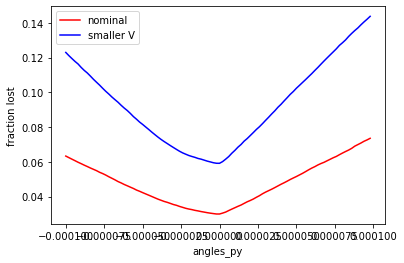

In [16]:
dimension='py'
scan = 'angles'
df = pd.DataFrame({scan:np.arange(-100, 100, 2)*1e-6})

pre = 'nominal '
with Pool(pool_size) as p:
    results = p.map(partial(get_lost_summary, dist=dist_nominal, pre=pre, dimension=dimension),
                    df[scan])
df[[pre+'top', pre+'bottom', pre+'lost']] = results


pre = 'smallerV '
with Pool(pool_size) as p:
    results = p.map(partial(get_lost_summary, dist=dist_smallerV, pre=pre, dimension=dimension),
                    df[scan])
df[[pre+'top', pre+'bottom', pre+'lost']] = results

df.to_pickle('efficiency_'+scan+'_'+dimension+'.pckl')
fig, ax = plt.subplots()

ax.plot(df[scan], df['nominal lost'], 'r-', label='nominal')
ax.plot(df[scan], df['smallerV lost'], 'b-', label='smaller V')
ax.legend()


ax.set_xlabel(scan+'_'+dimension)
ax.set_ylabel('fraction lost')

## misalignement effects

### Survey before 2014 alignement

In [38]:
alignement = {
    'TCSC front': [0.19e-3, 0.06e-3], 'TCSC back': [0.7e-3, 0.06e-3],
    'MSSB1 front': [-0.41e-3, 0.17e-3], 'MSSB1 back': [-0.81e-3, -0.11e-3],
    'MSSB2 front': [-0.35e-3, -0.22e-3], 'MSSB2 back': [0.01e-3, 0.12e-3],
    'MSSB3 front': [0.75e-3, 0.09e-3], 'MSSB3 back': [-0.09e-3, -0.02e-3],
    
}

get_lost_summary(0, dist=dist_nominal, pre='', dimension='x', alignement=alignement)

(0.45726, 0.49556, 0.04718)

### 2014 after alignment

In [39]:
alignement = {
    'TCSC front': [0.04e-3, -0.36e-3], 'TCSC back': [-0.07e-3, -0.26e-3],
    'MSSB1 front': [0.01e-3, -0.33e-3], 'MSSB1 back': [-0.05e-3, -0.29e-3],
    'MSSB2 front': [0.1e-3, -0.35e-3], 'MSSB2 back': [0, -0.25e-3],
    'MSSB3 front': [0.06e-3, -0.29e-3], 'MSSB3 back': [-0.06e-3, -0.3e-3],
    
}
get_lost_summary(0, dist=dist_nominal, pre='', dimension='x', alignement=alignement)

(0.47637, 0.49113, 0.0325)

### 2021 after alignement

In [40]:
alignement = {
    'TCSC front': [0.03e-3, 0.04e-3], 'TCSC back': [-0.14e-3, 0.0e-3],
    'MSSB1 front': [0.35e-3, -0.01e-3], 'MSSB1 back': [-0.11e-3, 0e-3],
    'MSSB2 front': [-0.22e-3, -0.04e-3], 'MSSB2 back': [-0.21e-3, -0.01e-3],
    'MSSB3 front': [0.19e-3, 0.02e-3], 'MSSB3 back': [0.11e-3, 0.09e-3],
    
}
get_lost_summary(0, dist=dist_nominal, pre='', dimension='x', alignement=alignement)

(0.46536, 0.50109, 0.03355)

However, there is an uncertainty on the roll of the TCSC. The target being 0.555m above the spliter blade, each mrad of roll creates an horizontal misalignement of cos(roll)*0.555 and a vertical one of sin(roll)*0.555

In [55]:
roll = 1e-3
dx, dy = (1-np.cos(roll))*0.555, np.sin(roll)*0.555

alignement = {
    'TCSC front': [0.03e-3+dx, 0.04e-3+dy], 'TCSC back': [-0.14e-3+dx, 0.0e-3+dy],
    'MSSB1 front': [0.35e-3, -0.01e-3], 'MSSB1 back': [-0.11e-3, 0e-3],
    'MSSB2 front': [-0.22e-3, -0.04e-3], 'MSSB2 back': [-0.21e-3, -0.01e-3],
    'MSSB3 front': [0.19e-3, 0.02e-3], 'MSSB3 back': [0.11e-3, 0.09e-3],
    
}
get_lost_summary(0, dist=dist_nominal, pre='', dimension='x', alignement=alignement)

(0.4511, 0.50109, 0.04781)

In [56]:
roll = 2e-3
dx, dy = (1-np.cos(roll))*0.555, np.sin(roll)*0.555

alignement = {
    'TCSC front': [0.03e-3+dx, 0.04e-3+dy], 'TCSC back': [-0.14e-3+dx, 0.0e-3+dy],
    'MSSB1 front': [0.35e-3, -0.01e-3], 'MSSB1 back': [-0.11e-3, 0e-3],
    'MSSB2 front': [-0.22e-3, -0.04e-3], 'MSSB2 back': [-0.21e-3, -0.01e-3],
    'MSSB3 front': [0.19e-3, 0.02e-3], 'MSSB3 back': [0.11e-3, 0.09e-3],
    
}
get_lost_summary(0, dist=dist_nominal, pre='', dimension='x', alignement=alignement)

(0.44245, 0.50109, 0.05646)

In [57]:
roll = 3e-3
dx, dy = (1-np.cos(roll))*0.555, np.sin(roll)*0.555

alignement = {
    'TCSC front': [0.03e-3+dx, 0.04e-3+dy], 'TCSC back': [-0.14e-3+dx, 0.0e-3+dy],
    'MSSB1 front': [0.35e-3, -0.01e-3], 'MSSB1 back': [-0.11e-3, 0e-3],
    'MSSB2 front': [-0.22e-3, -0.04e-3], 'MSSB2 back': [-0.21e-3, -0.01e-3],
    'MSSB3 front': [0.19e-3, 0.02e-3], 'MSSB3 back': [0.11e-3, 0.09e-3],
    
}
get_lost_summary(0, dist=dist_nominal, pre='', dimension='x', alignement=alignement)

(0.44082, 0.50109, 0.05809)

In [58]:
roll = 4e-3
dx, dy = (1-np.cos(roll))*0.555, np.sin(roll)*0.555

alignement = {
    'TCSC front': [0.03e-3+dx, 0.04e-3+dy], 'TCSC back': [-0.14e-3+dx, 0.0e-3+dy],
    'MSSB1 front': [0.35e-3, -0.01e-3], 'MSSB1 back': [-0.11e-3, 0e-3],
    'MSSB2 front': [-0.22e-3, -0.04e-3], 'MSSB2 back': [-0.21e-3, -0.01e-3],
    'MSSB3 front': [0.19e-3, 0.02e-3], 'MSSB3 back': [0.11e-3, 0.09e-3],
    
}
get_lost_summary(0, dist=dist_nominal, pre='', dimension='x', alignement=alignement)

(0.44115, 0.50109, 0.05776)

In [59]:
roll = 5e-3
dx, dy = (1-np.cos(roll))*0.555, np.sin(roll)*0.555

alignement = {
    'TCSC front': [0.03e-3+dx, 0.04e-3+dy], 'TCSC back': [-0.14e-3+dx, 0.0e-3+dy],
    'MSSB1 front': [0.35e-3, -0.01e-3], 'MSSB1 back': [-0.11e-3, 0e-3],
    'MSSB2 front': [-0.22e-3, -0.04e-3], 'MSSB2 back': [-0.21e-3, -0.01e-3],
    'MSSB3 front': [0.19e-3, 0.02e-3], 'MSSB3 back': [0.11e-3, 0.09e-3],
    
}
get_lost_summary(0, dist=dist_nominal, pre='', dimension='x', alignement=alignement)

(0.44093, 0.50109, 0.05798)

### test of 200 um vertical

In [46]:
alignement = {
    'TCSC front': [0, -0.1e-3], 'TCSC back': [0, 0.1e-3],
    'MSSB1 front': [0, -0.1e-3], 'MSSB1 back': [0, 0.1e-3],
    'MSSB2 front': [0, -0.1e-3], 'MSSB2 back': [0, 0.1e-3],
    'MSSB3 front': [0, -0.1e-3], 'MSSB3 back': [0, 0.1e-3],
    
}

get_lost_summary(0, dist=dist_nominal, pre='', dimension='x', alignement=alignement)

(0.46546, 0.49927, 0.03527)

### test of 200 um horizontal

In [47]:
alignement = {
    'TCSC front': [-0.1e-3, 0], 'TCSC back': [0.1e-3, 0],
    'MSSB1 front': [-0.1e-3, 0], 'MSSB1 back': [0.1e-3, 0],
    'MSSB2 front': [-0.1e-3, 0], 'MSSB2 back': [0.1e-3, 0],
    'MSSB3 front': [-0.1e-3, 0], 'MSSB3 back': [0.1e-3, 0],
    
}

get_lost_summary(0, dist=dist_nominal, pre='', dimension='x', alignement=alignement)

(0.46685, 0.5021, 0.03105)

### bad vertical misalignement

In [18]:
alignement = {
    'TCSC front': [0, -1.1e-3], 'TCSC back': [0, 1.1e-3],
    'MSSB1 front': [0, -1.1e-3], 'MSSB1 back': [0, 1.1e-3],
    'MSSB2 front': [0, -1.1e-3], 'MSSB2 back': [0, 1.1e-3],
    'MSSB3 front': [0, -1.1e-3], 'MSSB3 back': [0, 1.1e-3],
    
}

get_lost_summary(0, dist=dist_nominal, pre='', dimension='x', alignement=alignement)

(0.44029, 0.46332, 0.09639)

Text(0, 0.5, 'fraction lost')

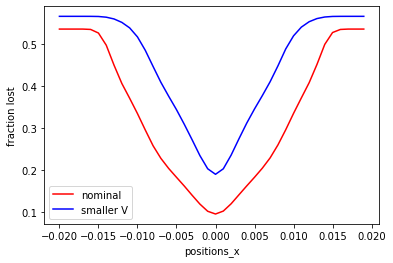

In [22]:
dimension='x'
scan = 'positions'
df = pd.DataFrame({scan:np.arange(-20, 20, 1)*1e-3})

pre = 'nominal '
with Pool(pool_size) as p:
    results = p.map(partial(get_lost_summary, dist=dist_nominal, pre=pre, dimension=dimension, alignement=alignement),
                    df[scan])
df[[pre+'top', pre+'bottom', pre+'lost']] = results


pre = 'smallerV '
with Pool(pool_size) as p:
    results = p.map(partial(get_lost_summary, dist=dist_smallerV, pre=pre, dimension=dimension, alignement=alignement),
                    df[scan])
df[[pre+'top', pre+'bottom', pre+'lost']] = results

df.to_pickle('efficiency_bad-aligned_'+scan+'_'+dimension+'.pckl')
fig, ax = plt.subplots()

ax.plot(df[scan], df['nominal lost'], 'r-', label='nominal')
ax.plot(df[scan], df['smallerV lost'], 'b-', label='smaller V')
ax.legend()


ax.set_xlabel(scan+'_'+dimension)
ax.set_ylabel('fraction lost')

Text(0, 0.5, 'fraction lost')

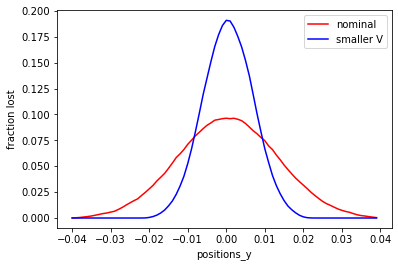

In [23]:
dimension='y'
scan = 'positions'
df = pd.DataFrame({scan:np.arange(-40, 40, 1)*1e-3})

pre = 'nominal '
with Pool(pool_size) as p:
    results = p.map(partial(get_lost_summary, dist=dist_nominal, pre=pre, dimension=dimension, alignement=alignement),
                    df[scan])
df[[pre+'top', pre+'bottom', pre+'lost']] = results


pre = 'smallerV '
with Pool(pool_size) as p:
    results = p.map(partial(get_lost_summary, dist=dist_smallerV, pre=pre, dimension=dimension, alignement=alignement),
                    df[scan])
df[[pre+'top', pre+'bottom', pre+'lost']] = results

df.to_pickle('efficiency_bad-aligned_'+scan+'_'+dimension+'.pckl')
fig, ax = plt.subplots()

ax.plot(df[scan], df['nominal lost'], 'r-', label='nominal')
ax.plot(df[scan], df['smallerV lost'], 'b-', label='smaller V')
ax.legend()


ax.set_xlabel(scan+'_'+dimension)
ax.set_ylabel('fraction lost')